In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
import tqdm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
import os

In [7]:
train_df

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,...,mc_xyz_x_mode_conc,range_xyz_y_range,iqr_xyz_y_iqr,mv_xyz_y_mode,mc_xyz_y_mode_conc,range_xyz_z_range,iqr_xyz_z_iqr,mv_xyz_z_mode,mc_xyz_z_mode_conc,Label
0,589,1153,795,2285,3329,3143,1816,1405,2067,2218,...,0.103138,116,42.0,182.5,0.102234,163,93.00,179.5,0.054787,0
1,358,991,581,2498,3626,3781,1888,1413,2614,1738,...,0.109606,111,43.0,179.5,0.113865,159,99.00,177.5,0.073789,0
2,581,1174,868,2458,4088,3442,1790,1379,2000,2110,...,0.100201,129,63.0,182.5,0.103268,165,108.00,179.5,0.061740,0
3,594,1146,704,1923,2987,2588,1617,1412,2016,2213,...,0.099244,125,45.0,184.5,0.092907,165,98.00,181.5,0.057733,0
4,480,902,690,2027,3454,3024,1500,1103,1496,1739,...,0.103564,123,47.0,178.5,0.085166,167,94.00,179.5,0.045324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,458,989,612,1711,3003,2581,1401,1122,1674,1643,...,0.129656,121,59.0,179.5,0.113927,165,111.00,177.5,0.068448,1
2404,372,881,520,1855,3893,2970,1401,1043,1662,1563,...,0.125928,138,60.0,180.5,0.118626,172,113.00,178.5,0.073700,1
2405,298,678,385,1481,2687,2403,1254,908,1555,1353,...,0.082064,80,42.0,180.5,0.082987,139,89.75,179.5,0.039686,1
2406,321,823,468,1794,3174,2976,1454,993,1628,1537,...,0.090454,100,48.0,179.5,0.097574,149,100.00,177.5,0.050897,1


                   Feature  Importance
118             Zernike_14    0.029546
134      minor_axis_length    0.029323
111              Zernike_7    0.028432
208           pf_lab_a_p25    0.025452
133      major_axis_length    0.024236
142           aspect_ratio    0.023673
127             Zernike_23    0.023284
126             Zernike_22    0.022522
139         shape_factor_3    0.020625
32                  mean_h    0.019794
117             Zernike_13    0.017268
116             Zernike_12    0.016645
207            pf_lab_a_p5    0.016201
110              Zernike_6    0.015298
47                   wav_h    0.014058
145            compactness    0.013737
38                  skew_h    0.013621
144              roundness    0.013318
191           pf_hsv_h_p95    0.013240
124             Zernike_20    0.013066
146               solidity    0.012647
123             Zernike_19    0.011215
130                 length    0.010407
106              Zernike_2    0.010312
107              Zernike_

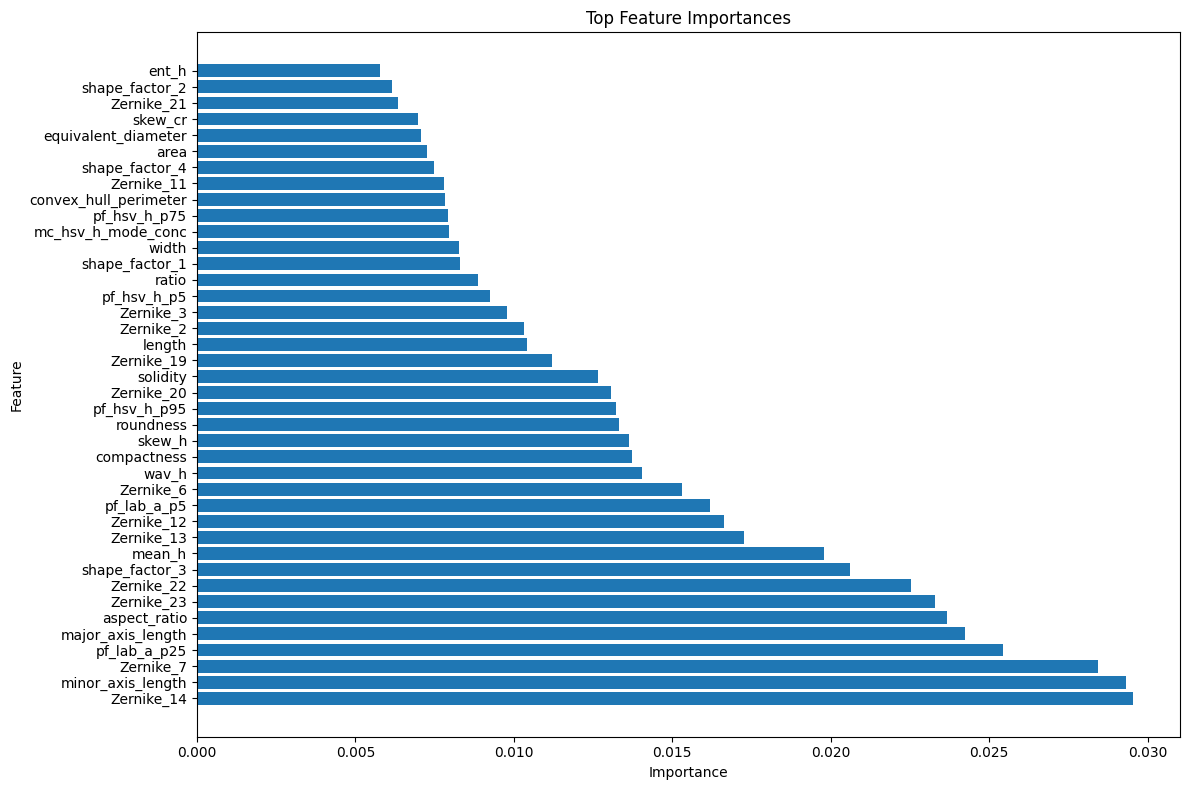

Selected 68 features: ['texture_third_moment', 'skew_g', 'mean_h', 'std_h', 'skew_h', 'skew_v', 'ent_h', 'wav_h', 'mean_b', 'skew_l', 'ent_a', 'wav_a', 'skew_y', 'skew_cb', 'skew_cr', 'kur_cb', 'ent_cr', 'skew_x', 'skew_Y', 'Zernike_1', 'Zernike_2', 'Zernike_3', 'Zernike_5', 'Zernike_6', 'Zernike_7', 'Zernike_8', 'Zernike_11', 'Zernike_12', 'Zernike_13', 'Zernike_14', 'Zernike_15', 'Zernike_18', 'Zernike_19', 'Zernike_20', 'Zernike_21', 'Zernike_22', 'Zernike_23', 'Zernike_24', 'area', 'length', 'width', 'ratio', 'major_axis_length', 'minor_axis_length', 'convex_hull_area', 'convex_hull_perimeter', 'shape_factor_1', 'shape_factor_2', 'shape_factor_3', 'shape_factor_4', 'equivalent_diameter', 'aspect_ratio', 'roundness', 'compactness', 'solidity', 'var_ratio_H_V', 'var_ratio_A_B', 'pf_hsv_h_p5', 'pf_hsv_h_p25', 'pf_hsv_h_p75', 'pf_hsv_h_p95', 'pf_lab_a_p5', 'pf_lab_a_p25', 'pf_lab_a_p95', 'pf_ycrcb_cr_p5', 'pf_ycrcb_cb_p75', 'mc_hsv_h_mode_conc', 'mc_lab_a_mode_conc']


In [ ]:


# Load the training dataset
train_df = pd.read_csv('/home/duyle/Rice_photos/results/results_aug/aug_q5_train.csv')

# Separate features and labels
X_train = train_df.drop(columns=['Label'])  # Features
y_train = train_df['Label']  # Labels

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the top N features
top_n = 40  # Adjust as needed
print(feature_importance_df.head(top_n))

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(top_n), feature_importance_df['Importance'].head(top_n))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()

# Selecting features using a threshold
selector = SelectFromModel(rf, threshold='mean')  # You can adjust the threshold
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_features_idx = selector.get_support()

# Get the names of the selected features
selected_features = X_train.columns[selected_features_idx]
print(f"Selected {len(selected_features)} features: {list(selected_features)}")

# # Create new datasets with only the selected features
# X_train_selected = selector.transform(X_train)

# # Now you can save the list of selected features to use with your test data later
# np.save('selected_features.npy', selected_features)


In [12]:
test_df = pd.read_csv('/home/duyle/Rice_photos/results/results_aug/aug_bc15_test.csv')
X_test= test_df.drop(columns=['Label'])  # Features for testing
y_test = test_df['Label']  # Labels for testing

In [13]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [14]:
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_selected, y_train)
model  =SVC(kernel='rbf', gamma = "auto", C=2,random_state=42)
model.fit(X_train_selected, y_train)

SVC(C=2, gamma='auto', random_state=42)

In [15]:
y_pred = final_model.predict(X_test_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       369
           1       0.92      0.99      0.95       367

    accuracy                           0.95       736
   macro avg       0.95      0.95      0.95       736
weighted avg       0.95      0.95      0.95       736



In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(accuracy, precision, recall, f1, cv_scores.mean())

0.9497282608695652 0.9521714083680842 0.9497282608695652 0.9496655455809745 0.501360074416507


/home/duyle/Rice_photos/results/results_aug/aug_bc15.csv


/tmp/ipykernel_188548/1942323691.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')


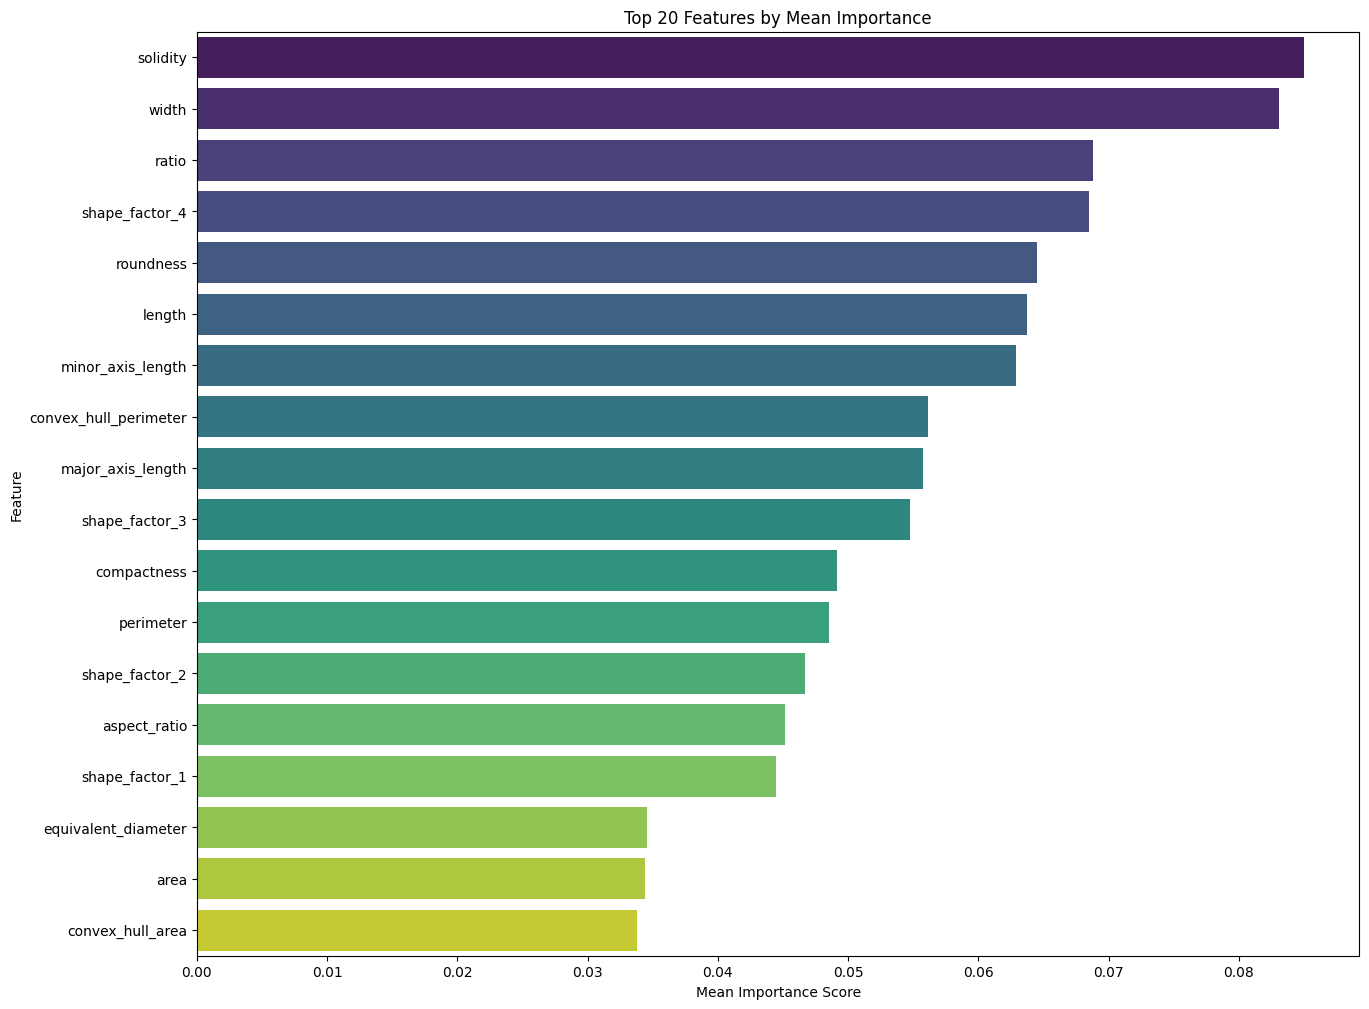

In [3]:

# Define the directory containing the CSV files
# directory = '/home/duyle/Rice_photos/features_extracted/moments'
directory = '/home/duyle/Rice_photos/results/results_aug'
res = {}

# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(file_path)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Split features and target variable
        X = df.iloc[:, :-1]  # Features
        y = df.iloc[:, -1]   # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Train the Random Forest Classifier
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Store feature importances
        importances = rf.feature_importances_
        feature_names = X.columns
        
        # Store as a DataFrame
        for i, feature in enumerate(feature_names):
            res[feature] = res.get(feature, 0) + importances[i]  # Accumulate importance scores

# Convert the result to a DataFrame
importance_df = pd.DataFrame(list(res.items()), columns=['Feature', 'Total_Importance'])

# Calculate mean and standard deviation
importance_df['mean_importance'] = importance_df['Total_Importance'] / len(os.listdir(directory))
importance_df['std_importance'] = importance_df['Total_Importance'].std()  # Not necessary for mean importance

# Select the top N features based on mean importance
top_n = 20  # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

# Plotting the top features
plt.figure(figsize=(15, 12))
sns.barplot(x='mean_importance', y='Feature', data=global_features, palette='viridis')
plt.title('Top 20 Features by Mean Importance')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.show()


In [4]:
top_n = 60 # Adjust this as needed
global_features = importance_df.sort_values('mean_importance', ascending=False).head(top_n)

In [50]:
global_features

,Feature,Total_Importance,mean_importance,std_importance
127,Zernike_7,0.244053,0.017432,0.031537
155,shape_factor_3,0.212471,0.015177,0.031537
149,major_axis_length,0.159710,0.011408,0.031537
161,compactness,0.152395,0.010885,0.031537
140,Zernike_20,0.146404,0.010457,0.031537
184,min_rect_ratio,0.137196,0.009800,0.031537
148,ratio,0.128027,0.009145,0.031537
181,elongation_factor,0.124053,0.008861,0.031537
123,Zernike_3,0.119106,0.008508,0.031537
134,Zernike_14,0.116116,0.008294,0.031537


In [51]:
global_features['Feature']
top100 = []
for i in global_features['Feature']:
    top100.append(i)

In [52]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=21),
    "Support Vector Machine": SVC(kernel='rbf', gamma = "auto", C=2),
    # "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=20)
    
}

In [53]:
# df=pd.read_csv(f'/home/duyle/Rice_photos/results/test_old_BC-15.csv')
# all_results = []
# directory = '/home/duyle/Rice_photos/results'
directory = '/home/duyle/Rice_photos/features_extracted/moments'
all_results = []
# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(file_path)
# # Ensure 'Label' column is included
# for feature_combo in tqdm.tqdm(feature_combinations,'Choosing cominations of features..'):
#     selected_features = []
    
#     # Combine selected feature groups
#     for group in feature_combo:
#         selected_features.extend(feature_groups[group])

    df = pd.read_csv(file_path)
    df_selected = df[top100 + ["Label"]]
    X = df_selected.drop(columns=['Label'])
    y = df_selected['Label']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)



    for name, model in tqdm.tqdm(models.items(), 'Training models..'):
        # print(f"🚀 Training {name} on {feature_combo}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(cv_scores)
        all_results.append({
            "Model": name,
            "Dataset": file_path,
            # "Feature Combination": "+".join(feature_combo),
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision,4),
            "Recall": round(recall,4),
            "F1 Score": round(f1,4),
            "CV_scores(5fold)": round(np.mean(cv_scores),4)
        })
    
results_df = pd.DataFrame(all_results)
results_df 


/home/duyle/Rice_photos/features_extracted/moments/new_color_TH3-5.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.97482014 0.93884892 0.94964029 0.9352518  0.93862816]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

[0.98201439 0.97482014 0.97841727 0.97841727 0.96750903]


/home/duyle/Rice_photos/features_extracted/moments/new_color_Q-5.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.91871456 0.9584121  0.95075758 0.9469697  0.93560606]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]


[0.94328922 0.96408318 0.96212121 0.95265152 0.94318182]


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.91871456 0.9584121  0.95075758 0.9469697  0.93560606]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


[0.94328922 0.96408318 0.96212121 0.95265152 0.94318182]
/home/duyle/Rice_photos/features_extracted/moments/new_color_Nep-87.csv


Training models..: 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


[0.9765625  0.98958333 0.9765625  0.97916667 0.9765625 ]
[0.98697917 0.98958333 0.97916667 0.984375   0.98177083]


Training models..: 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]


[0.9765625  0.98958333 0.9765625  0.97916667 0.9765625 ]
[0.98697917 0.98958333 0.97916667 0.984375   0.98177083]
/home/duyle/Rice_photos/features_extracted/moments/new_color_Thien_uu-8.csv


Training models..: 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

[0.95035461 0.96099291 0.96808511 0.9751773  0.96085409]
[0.96808511 0.97163121 0.96808511 0.96808511 0.96797153]



Training models..: 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]


[0.95035461 0.96099291 0.96808511 0.9751773  0.96085409]
[0.96808511 0.97163121 0.96808511 0.96808511 0.96797153]


Training models..: 100%|██████████| 2/2 [00:00<00:00, 13.27it/s]


[0.95035461 0.96099291 0.96808511 0.9751773  0.96085409]
[0.96808511 0.97163121 0.96808511 0.96808511 0.96797153]
/home/duyle/Rice_photos/features_extracted/moments/new_color_BC-15.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.93055556 0.94246032 0.95833333 0.92445328 0.94234592]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]


[0.96626984 0.95833333 0.97619048 0.97415507 0.96023857]
/home/duyle/Rice_photos/features_extracted/moments/new_color_Xi-23.csv


Training models..:  50%|█████     | 1/2 [00:00<00:00,  5.56it/s]

[0.9218241  0.9218241  0.92495922 0.92169657 0.92659054]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


[0.93159609 0.93159609 0.93474715 0.92659054 0.94290375]


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.9218241  0.9218241  0.92495922 0.92169657 0.92659054]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


[0.93159609 0.93159609 0.93474715 0.92659054 0.94290375]


Training models..:  50%|█████     | 1/2 [00:00<00:00,  6.07it/s]

[0.9218241  0.9218241  0.92495922 0.92169657 0.92659054]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


[0.93159609 0.93159609 0.93474715 0.92659054 0.94290375]


Training models..:  50%|█████     | 1/2 [00:00<00:00,  7.43it/s]

[0.9218241  0.9218241  0.92495922 0.92169657 0.92659054]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


[0.93159609 0.93159609 0.93474715 0.92659054 0.94290375]
/home/duyle/Rice_photos/features_extracted/moments/new_color_Huong_thom-1.csv


Training models..:   0%|          | 0/2 [00:00<?, ?it/s]

[0.87564767 0.90138408 0.92387543 0.89619377 0.91176471]


Training models..: 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

[0.89291883 0.92041522 0.94463668 0.92214533 0.92214533]


,Model,Dataset,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
0,K-Nearest Neighbors,/home/duyle/Rice_photos/features_extracted/mom...,0.9285,0.9313,0.9285,0.9285,0.9474
1,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9620,0.9627,0.9620,0.9621,0.9762
2,K-Nearest Neighbors,/home/duyle/Rice_photos/features_extracted/mom...,0.9339,0.9368,0.9339,0.9340,0.9421
3,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9639,0.9644,0.9639,0.9639,0.9531
4,K-Nearest Neighbors,/home/duyle/Rice_photos/features_extracted/mom...,0.9339,0.9368,0.9339,0.9340,0.9421
5,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9639,0.9644,0.9639,0.9639,0.9531
6,K-Nearest Neighbors,/home/duyle/Rice_photos/features_extracted/mom...,0.9715,0.9722,0.9715,0.9715,0.9797
7,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9831,0.9831,0.9831,0.9831,0.9844
8,K-Nearest Neighbors,/home/duyle/Rice_photos/features_extracted/mom...,0.9715,0.9722,0.9715,0.9715,0.9797
9,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9831,0.9831,0.9831,0.9831,0.9844


In [55]:
results_df[results_df['Model'] == 'Support Vector Machine'].sort_values('CV_scores(5fold)', ascending=False)

,Model,Dataset,Accuracy,Precision,Recall,F1 Score,CV_scores(5fold)
9,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9831,0.9831,0.9831,0.9831,0.9844
7,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9831,0.9831,0.9831,0.9831,0.9844
1,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9620,0.9627,0.9620,0.9621,0.9762
11,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9726,0.9726,0.9726,0.9726,0.9688
15,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9726,0.9726,0.9726,0.9726,0.9688
13,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9726,0.9726,0.9726,0.9726,0.9688
17,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9581,0.9583,0.9581,0.9581,0.9670
3,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9639,0.9644,0.9639,0.9639,0.9531
5,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9639,0.9644,0.9639,0.9639,0.9531
19,Support Vector Machine,/home/duyle/Rice_photos/features_extracted/mom...,0.9213,0.9232,0.9213,0.9214,0.9335
